In [9]:
##Import needed libraries
import pymc3 as pm
import numpy as np
import pandas as pd

%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats

# Handy dandy links

Continuous: https://docs.pymc.io/api/distributions/continuous.html
    
Discrete: https://docs.pymc.io/api/distributions/discrete.html

Seems to have everything: https://docs.pymc.io/notebooks/api_quickstart.html

# ------------------- C O N T I N U O U S ------------------

# Exponential

https://en.wikipedia.org/wiki/Exponential_distribution

- continuous and positive

- mean = 1/$\lambda$

In [12]:
with pm.Model() as model:
    exp0 = pm.Exponential('exp0', 0.1)
    exp1 = pm.Exponential('exp1', 0.5)
    exp2 = pm.Exponential('exp2', 0.9)
exp0

exp0

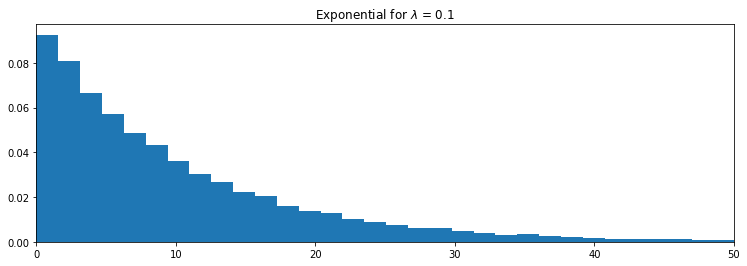

In [74]:
# plot
figsize(12.5, 4)

samples0 = exp0.random(size=20000)
plt.hist(samples0, bins=70, normed=True, histtype="stepfilled")
plt.title("Exponential for $\lambda$ = 0.1")
plt.xlim(0, 50);

# Beta

https://en.wikipedia.org/wiki/Beta_distribution

- Continuous probability distributions between [0,1]

- Parametrized by $\alpha$ and $\beta$

- Suitable to model the random behaviour of percentages and poportions

- Beta distribution is a conjugate prior for the parameter 𝑝 of the binomial distribution.

- Mean = $\frac{\alpha}{\alpha + \beta}$

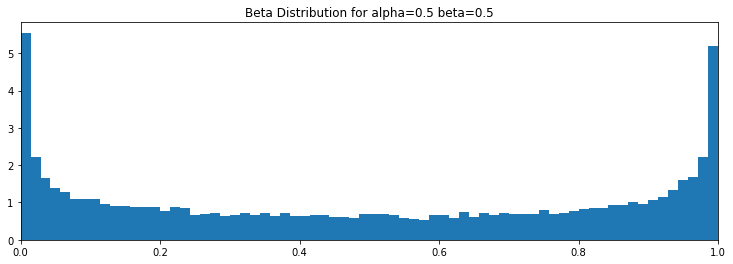

In [36]:
with pm.Model() as model:
    beta0 = pm.Beta('beta0', alpha=0.5, beta=0.5)
    #yhat = 10 # uhh some sort of alternative?
    #model_error = 0.05
    #beta0 = pm.Beta('beta0', mu=yhat, sd=model_error, )

# plot
figsize(12.5, 4)

samples0 = beta0.random(size=20000)
plt.hist(samples0, bins=70, normed=True, histtype="stepfilled")
plt.title("Beta Distribution for alpha=0.5 beta=0.5")
plt.xlim(0, 1);

# Uniform

https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)


(Double check that the model is discrete of continuous)

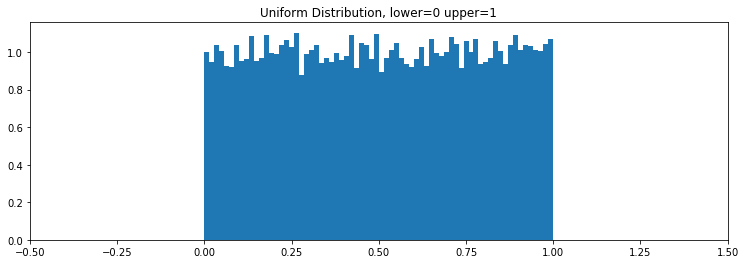

In [39]:
with pm.Model() as model:
    uniform0 = pm.Uniform('uniform0', lower=0, upper=1)

# plot
figsize(12.5, 4)
samples0 = uniform0.random(size=20000)
plt.hist(samples0, bins=70, normed=True, histtype="stepfilled")
plt.title("Uniform Distribution, lower=0 upper=1")
plt.xlim(-0.5, 1.5);

# Normal

https://en.wikipedia.org/wiki/Normal_distribution

- mean, m

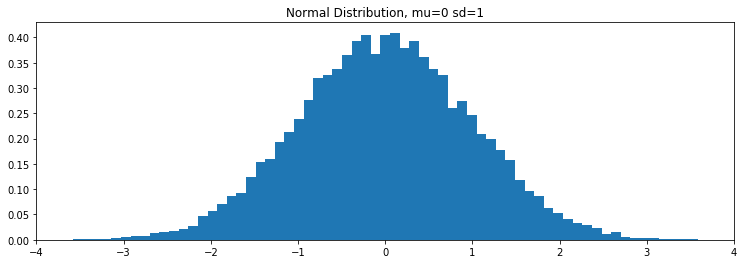

In [41]:
with pm.Model():
    x = pm.Normal('x', mu=0, sd=1)

# plot
figsize(12.5, 4)
samples0 = x.random(size=20000)
plt.hist(samples0, bins=70, normed=True, histtype="stepfilled")
plt.title("Normal Distribution, mu=0 sd=1")
plt.xlim(-4, 4);

# ---------------------  D I S C R E T E -----------------------

## Poisson
https://en.wikipedia.org/wiki/Poisson_distribution

- count occurences of things, e.g. how many letters you are receiving per day (who receives letters these days?!)

- governed by lambda

- mean = $\lambda$

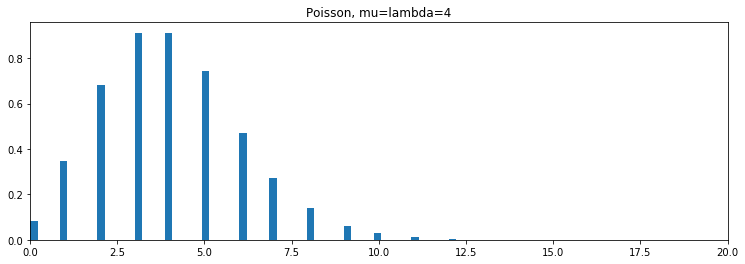

In [72]:
with pm.Model():
    fish0 = pm.Poisson('fish0', mu = 4)
    # obs_A = pm.Poisson("obs_A", mu_A, observed = observations_A) # from exam, just as an example
    
# plot
figsize(12.5, 4)
samples0 = fish0.random(size=20000)
plt.hist(samples0, bins=70, normed=True, histtype="stepfilled")
plt.title("Poisson, mu=lambda=4")
plt.xlim(0, 20);

## Bernoulli

https://en.wikipedia.org/wiki/Bernoulli_distribution

- Takes the value 1 with probability $p$ and 0 with the probability $1-p$

- is it the probability distribution of any SINGLE experiment that asks a yes-no question

- essentially, a special case of the binomial distribution where a SINGLE trial is conducted

- mean = $p$

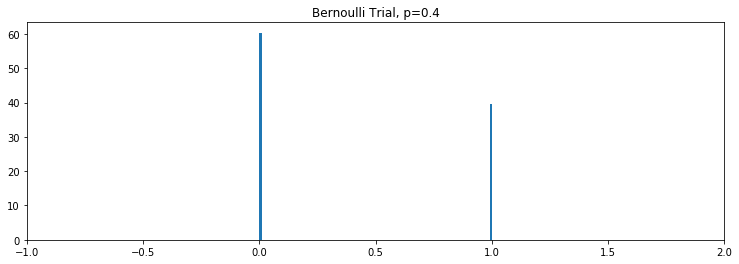

In [48]:
with pm.Model():
    bern0 = pm.Bernoulli('bern0', p=0.4)

# plot
figsize(12.5, 4)
samples0 = bern0.random(size=20000)
plt.hist(samples0, bins=100, normed=True, histtype="stepfilled")
plt.title("Bernoulli Trial, p=0.4")
plt.xlim(-1, 2);
# shows that out of 100, you'll get 1 with a chance of 0.4

# Binomial

https://en.wikipedia.org/wiki/Binomial_distribution

- Discrete probabilit distribution of the number of successes in a sequence of $n$ independent experiments

- mean = $np$

In [61]:
with pm.Model():
    binomial0 = pm.Binomial('binomial0', p=.7, n=100)

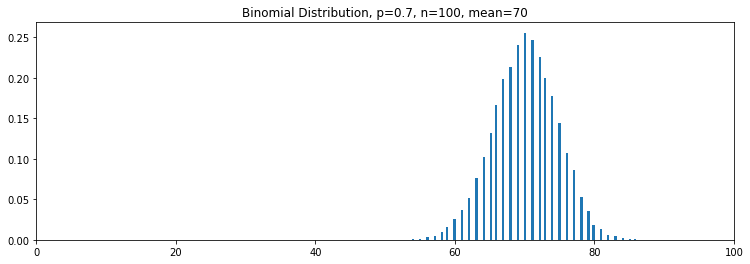

In [67]:
# plot
figsize(12.5, 4)
samples0 = binomial0.random(size=20000)
plt.hist(samples0, bins=100, normed=True, histtype="stepfilled")
plt.title("Binomial Distribution, p=0.7, n=100, mean=70")
plt.xlim(0, 100);